# **Machine Learning**

1. Importing dependencies

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. Data Collection & Processing

In [162]:
#Loading the data from csv file to Pandas Dataframe
titanic_data = pd.read_csv('/content/train.csv')

In [163]:
#print the first five rows of the data frame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
#Check the number of rows and columns
titanic_data.shape

(891, 12)

In [165]:
#The infomation about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
#check the missing value of each columns
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3. Dealing with the missing value

In [167]:
#Drop the Cabin column from the data frame
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [168]:
# For age column we will replace it with the mean age/the average age
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [169]:
# For the embark, find the most repeat embark and replace it with the two numbers that are missing
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [170]:
print(titanic_data['Embarked'].mode()[0])
#replacing the missing value embarked in the column
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

S


In [171]:
#check the missing value of each columns again
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

4. Data Analysis

In [172]:
# Getting some statistical data to measure
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0 --> Not survived
1 --> Survived

In [173]:
# Finding the number of people survive and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

5. Data Visualization

In [174]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

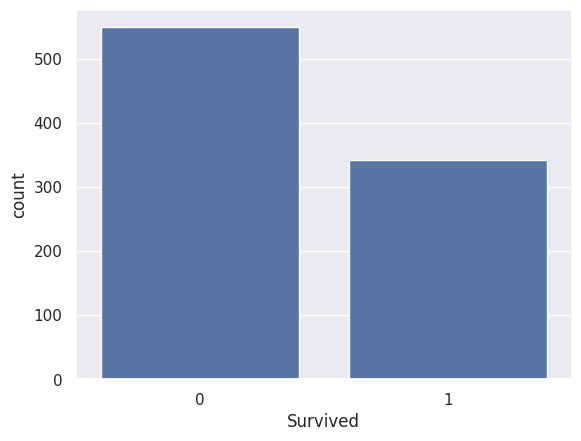

In [175]:
# making a count plot for survived column
sns.countplot(x='Survived', data=titanic_data)

In [176]:
# Finding the number of people sex
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

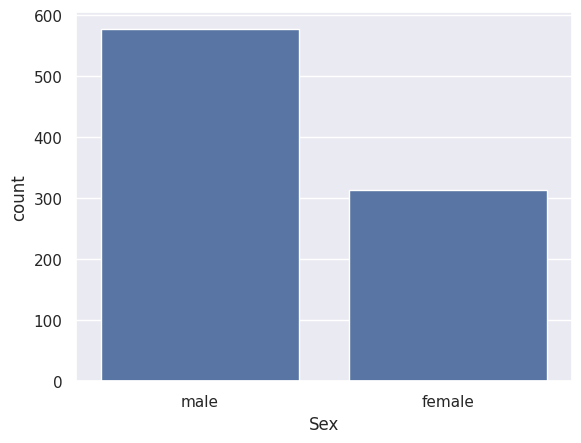

In [177]:
# making a count plot for survived column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

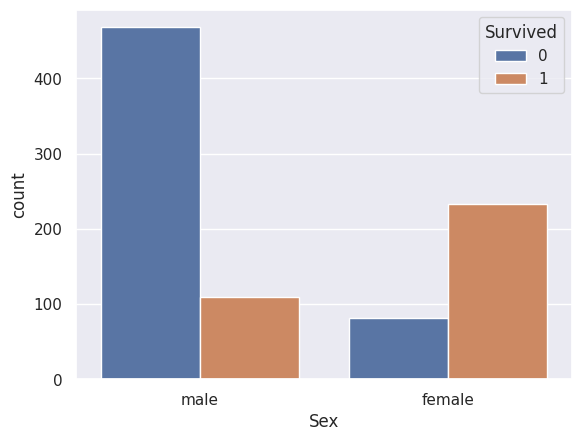

In [178]:
# number of survivors base on gender
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

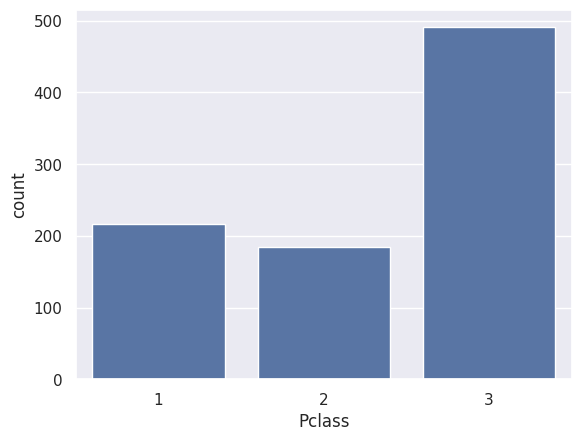

In [179]:
# making a count plot for Pclass column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

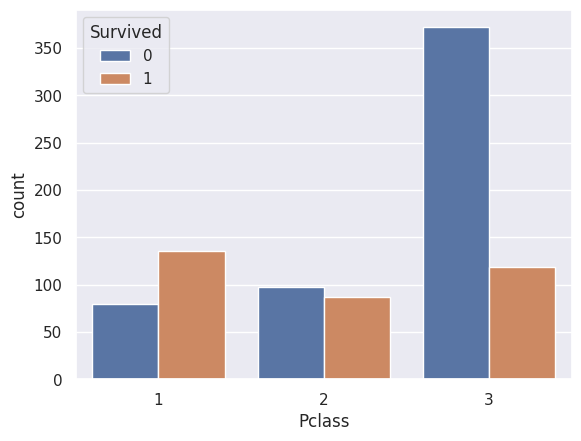

In [180]:
# number of survivors base on Pclass
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

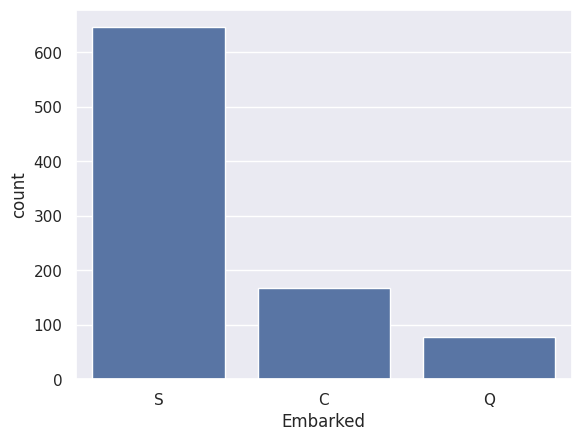

In [181]:
# making a count plot for Embarked column
sns.countplot(x='Embarked', data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

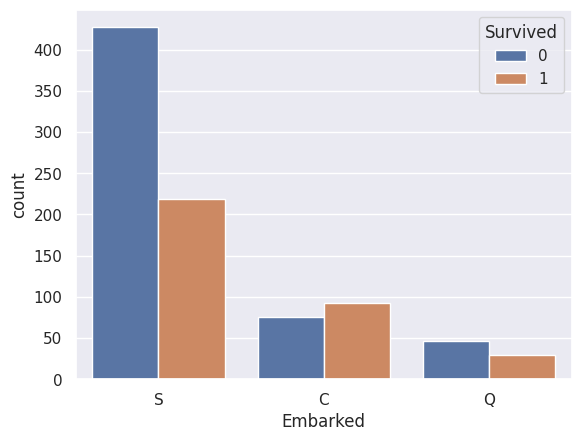

In [182]:
# number of survivors base on Embarked
sns.countplot(x='Embarked', hue='Survived', data=titanic_data)

6. Encoding the Categorical Columns

In [183]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [184]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [185]:
#convert the category colums
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


7. Seperating features & Target

In [186]:
X = titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1) # if we drop colums axis =1 or drop row=0
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [187]:
Y = titanic_data['Survived']
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


8. Spliting the data into training data & Test data

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [189]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


9. Model Training (Logistic Regression)

In [190]:
model = LogisticRegression()

In [191]:
#Train the logistic model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation (Accurate Score)

In [192]:
#the accuracy training data
X_train_prediction = model.predict(X_train)

In [193]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [194]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('The accurate of training dat: ',training_data_accuracy)

The accurate of training dat:  0.8075842696629213


In [195]:
#the accuracy testing data
X_test_prediction = model.predict(X_test)

In [196]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [197]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('The accurate of test dat: ',test_data_accuracy)

The accurate of test dat:  0.7821229050279329


Linear Model

In [198]:
#setting up a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [199]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Predict on training set
Y_train_predictions_linear = linear_model.predict(X_train)

The mean squared error (MSE) measures the average of the squared differences between the actual and predicted values of the target variable. It's calculated by taking the average of the squared residuals (the differences between actual and predicted values). A lower MSE indicates a better fit of the model to the data.

The mean absolute error (MAE) measures the average of the absolute differences between the actual and predicted values of the target variable. It provides a more interpretable representation of the model's performance compared to MSE because it's in the same units as the target variable.

The R-squared (R2) statistic measures the proportion of the variance in the target variable that is predictable from the input features. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variability of the target variable around its mean. R2 can be interpreted as the percentage of the target variable's variance that is explained by the model. Higher values of R2 indicate a better fit of the model to the data.

In [200]:
# Evaluation Metrics
mse = mean_squared_error(Y_train, Y_train_predictions_linear)
mae = mean_absolute_error(Y_train, Y_train_predictions_linear)
r2 = r2_score(Y_train, Y_train_predictions_linear)

In [201]:
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 0.1371060972888113
Mean Absolute Error (MAE): 0.2828019146132808
R-squared (R2): 0.411407577599743


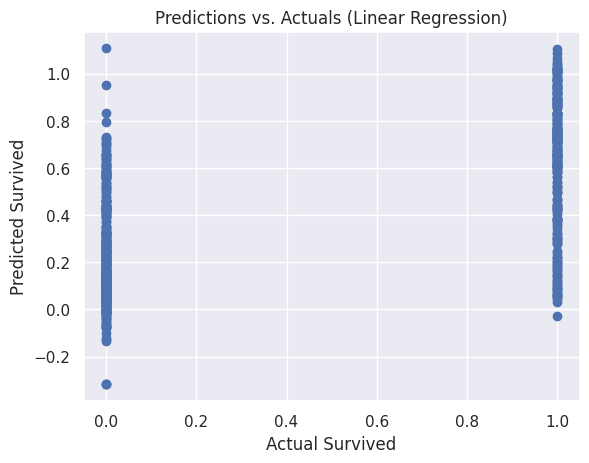

In [202]:
# Visualize Predictions vs. Actuals
plt.scatter(Y_train, Y_train_predictions_linear)
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Survived')
plt.title('Predictions vs. Actuals (Linear Regression)')
plt.show()


Residual analysis is a crucial step in evaluating the performance of a regression model. Residuals are the differences between the observed values (actual target values) and the predicted values generated by the model. Analyzing residuals helps us understand whether the model captures the underlying patterns in the data well or if there are systematic errors (patterns) in the predictions.

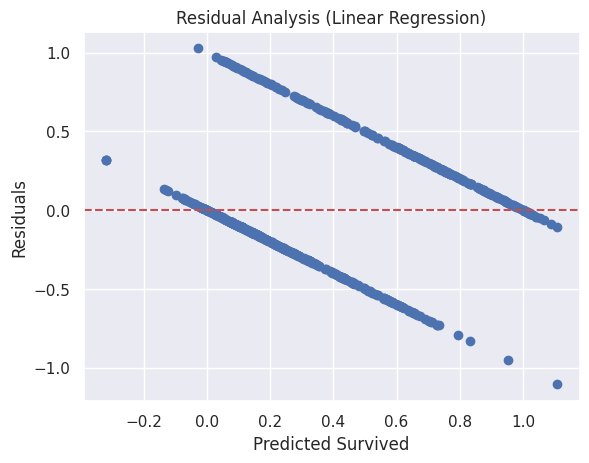

In [203]:
# Residual Analysis
residuals = Y_train - Y_train_predictions_linear
plt.scatter(Y_train_predictions_linear, residuals)
plt.xlabel('Predicted Survived')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Analysis (Linear Regression)')
plt.show()

Accuracy of linear model

**Threshold:**

The threshold is a value that separates the predicted probabilities or continuous predictions into two classes or categories. In binary classification tasks, it's typically set at 0.5, but it can be adjusted based on the specific requirements or the trade-off between false positives and false negatives.
For example, if the predicted probability of an event (e.g., survival) is greater than the threshold, the model predicts the positive class (e.g., survived). If it's less than or equal to the threshold, the model predicts the negative class (e.g., not survived).

**In the context of linear regression used for binary classification** (which is not the standard use case), binary predictions are obtained by comparing the continuous predictions from the regression model with the threshold and converting them into binary form.

In [204]:
# Predict target variable for test data using the trained linear regression model
Y_test_predictions_linear = linear_model.predict(X_test)

# Define a threshold (e.g., 0.5)
threshold = 0.5

# Convert predicted probabilities to binary predictions
binary_predictions = (Y_test_predictions_linear > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(Y_test, binary_predictions)

print('Accuracy:', accuracy)


Accuracy: 0.7541899441340782


Standardize the data


In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [206]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [207]:
print("Shape of X_train_std:", X_train_std.shape)

Shape of X_train_std: (712, 7)


Setting up a linear Model


# **Deep Learning**

In [208]:
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [209]:
# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(7,)),  # Convert to a single dimension
    keras.layers.Dense(10, activation='relu'),  # Adjust the number of units as needed
    keras.layers.Dense(2, activation='sigmoid')  # Output layer since it has two classes (0 and 1)
])

In [210]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [211]:
# Train the model
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)


Epoch 1/10
20/20 [==============================] - 1s 12ms/step - loss: 1.0936 - accuracy: 0.3766 - val_loss: 1.0816 - val_accuracy: 0.3611
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.9616 - accuracy: 0.3844 - val_loss: 0.9700 - val_accuracy: 0.3611
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.8610 - accuracy: 0.4469 - val_loss: 0.8716 - val_accuracy: 0.3889
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7732 - accuracy: 0.5266 - val_loss: 0.7964 - val_accuracy: 0.4167
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.5813 - val_loss: 0.7354 - val_accuracy: 0.4306
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.6375 - val_loss: 0.6847 - val_accuracy: 0.5694
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6063 - accuracy: 0.7344 - val_loss: 0.6464 - val_accuracy: 0.6806
Epoch 8/10
20/20 [=

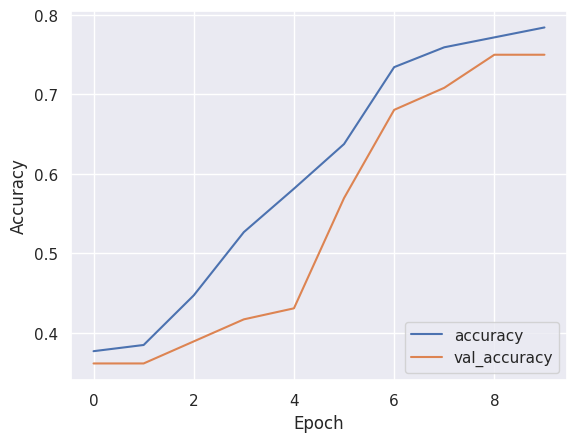

In [212]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

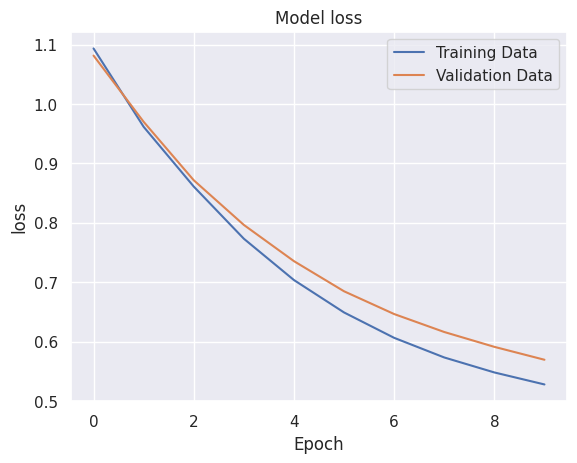

In [213]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.show()



# **Random Forest**

RandomForestClassifier is a class from scikit-learn that implements the Random Forest algorithm for classification tasks.

+ n_estimators=100  specifies the number of trees in the forest. In this case, we're using 100 trees. A higher number of trees can lead to better performance but may also increase computational time.

+ random_state=42 is used to set the random seed for reproducibility. It ensures that the results are consistent each time you run the code, as the randomness in the algorithm is controlled.

In [214]:
# Set up Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [215]:
# Train the Random Forest model
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [216]:
# Make predictions on the test set
Y_test_predictions_rf = random_forest_model.predict(X_test)

In [217]:
# Calculate accuracy
accuracy_rf = accuracy_score(Y_test, Y_test_predictions_rf)
print('Random Forest Accuracy:', accuracy_rf)

Random Forest Accuracy: 0.8044692737430168


The confusion matrix is a table that summarizes the performance of a classification model by presenting the counts of true positive, true negative, false positive, and false negative predictions.

It provides a more detailed understanding of the model's performance, especially in terms of its ability to correctly classify different classes.

 It presents the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

**Interpretation:**

True Negative (TN): 87 instances were correctly predicted as "not survived."
False Positive (FP): 13 instances were incorrectly predicted as "survived" when they actually were "not survived."
False Negative (FN): 22 instances were incorrectly predicted as "not survived" when they actually were "survived."
True Positive (TP): 57 instances were correctly predicted as "survived."


In [218]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(Y_test, Y_test_predictions_rf)
print('\nConfusion Matrix:')
print(conf_matrix_rf)


Confusion Matrix:
[[87 13]
 [22 57]]


The classification report is a text summary of various classification metrics such as precision, recall, F1-score, and support for each class.

It provides insights into the model's performance for each class, allowing you to assess its strengths and weaknesses across different categories.

In [219]:
# Classification Report
class_report_rf = classification_report(Y_test, Y_test_predictions_rf)
print('\nClassification Report:')
print(class_report_rf)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.81      0.72      0.77        79

    accuracy                           0.80       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179

